## Titanic Prediction
### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train = pd.read_csv('train.csv')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print (train.shape)
print (train.size)

(891, 12)
10692


<function matplotlib.pyplot.show>

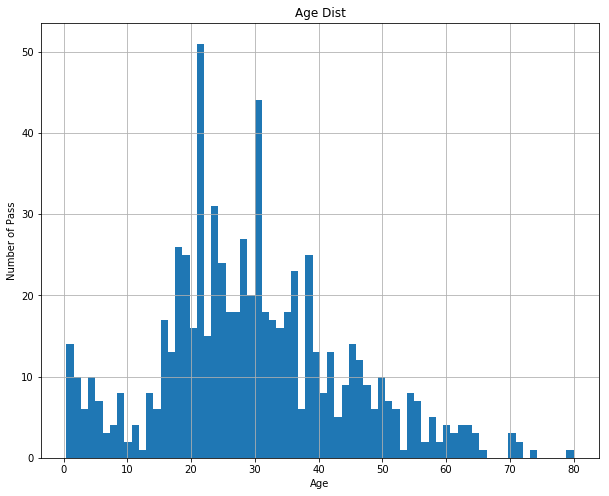

In [11]:
plt.figure(figsize=(10,8))
train['Age'].hist(bins=70)
plt.title("Age Dist")
plt.xlabel('Age')
plt.ylabel('Number of Pass')
plt.show

<function matplotlib.pyplot.show>

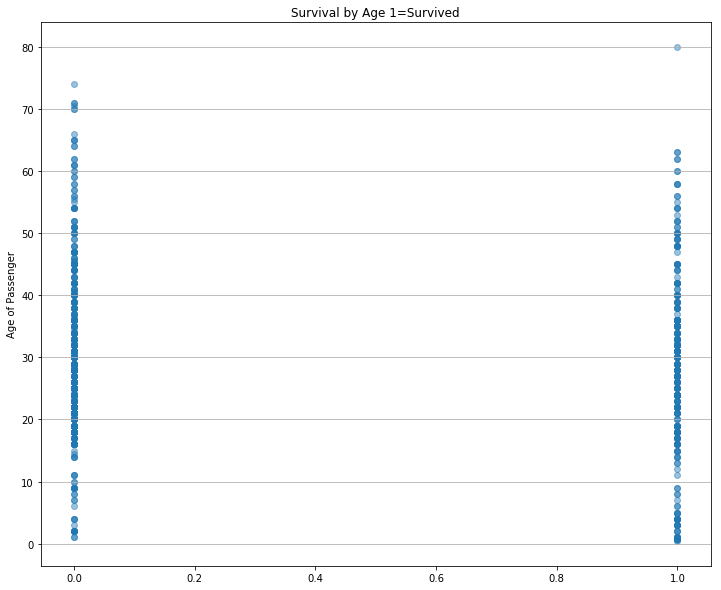

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(train.Survived,train.Age,alpha=.45)
plt.title("Survival by Age 1=Survived")
plt.ylabel('Age of Passenger')
plt.grid(b=True,which='major',axis='y')
plt.show

## Machine Learning Algorithms

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
## Check if there are missing values

test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [37]:
# Replacing the missing values in test data.

test['Sex']=test['Sex'].apply(lambda sex:1 if sex=='male' else 0)
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [38]:
# Replacing the missing values in train data.

train['Sex']=train['Sex'].apply(lambda sex:1 if sex=='male' else 0)
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Fare']=train['Fare'].fillna(train['Fare'].mean())
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [48]:
cols=["Pclass","Sex","Age"]
survived = train['Survived'].values
data_train = train[cols].values
data_test = test[cols].values

In [49]:
model = LogisticRegression()

In [50]:
model.fit(data_train,survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
#model persistance 
import pickle as pkl

persist_model = pkl.dumps(model)
persist_model

b'\x80\x03csklearn.linear_model.logistic\nLogisticRegression\nq\x00)\x81q\x01}q\x02(X\x07\x00\x00\x00penaltyq\x03X\x02\x00\x00\x00l2q\x04X\x04\x00\x00\x00dualq\x05\x89X\x03\x00\x00\x00tolq\x06G?\x1a6\xe2\xeb\x1cC-X\x01\x00\x00\x00Cq\x07G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00fit_interceptq\x08\x88X\x11\x00\x00\x00intercept_scalingq\tK\x01X\x0c\x00\x00\x00class_weightq\nNX\x0c\x00\x00\x00random_stateq\x0bNX\x06\x00\x00\x00solverq\x0cX\t\x00\x00\x00liblinearq\rX\x08\x00\x00\x00max_iterq\x0eKdX\x0b\x00\x00\x00multi_classq\x0fX\x03\x00\x00\x00ovrq\x10X\x07\x00\x00\x00verboseq\x11K\x00X\n\x00\x00\x00warm_startq\x12\x89X\x06\x00\x00\x00n_jobsq\x13K\x01X\x08\x00\x00\x00classes_q\x14cnumpy.core.multiarray\n_reconstruct\nq\x15cnumpy\nndarray\nq\x16K\x00\x85q\x17C\x01bq\x18\x87q\x19Rq\x1a(K\x01K\x02\x85q\x1bcnumpy\ndtype\nq\x1cX\x02\x00\x00\x00i8q\x1dK\x00K\x01\x87q\x1eRq\x1f(K\x03X\x01\x00\x00\x00<q NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq!b\x89C\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01